In [58]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd 
import scipy

In [127]:
#マイケルソン干渉計の実験データ
data_1 = {"ミラーの移動量(μm)": [2, 4, 10, 20, 30], "縞の移動量(個)": [3.5, 7, 14.8, 27, 48]}
df_1 = pd.DataFrame(data_1)
df_1["ミラーの移動量(μm)"] = df_1["ミラーの移動量(μm)"]*0.5
df_1.head()

,ミラーの移動量(μm),縞の移動量(個)
0,1.0,3.5
1,2.0,7.0
2,5.0,14.8
3,10.0,27.0
4,15.0,48.0


In [161]:
#実験値の波長を求める
df_1["波長(nm)"] = round(2e3 * df_1["ミラーの移動量(μm)"] / df_1["縞の移動量(個)"], 1)
df_1.to_csv("DataSet/jikkenA4-1.csv", index=False)
df_1.head()

,ミラーの移動量(μm),縞の移動量(個),波長(nm)
0,1.0,3.5,571.4
1,2.0,7.0,571.4
2,5.0,14.8,675.7
3,10.0,27.0,740.7
4,15.0,48.0,625.0


In [129]:
print(df_1.mean())
print("----------------------------")
print(df_1.var())

ミラーの移動量(μm)      6.600000
縞の移動量(個)        20.060000
波長(nm)         636.854712
dtype: float64
----------------------------
ミラーの移動量(μm)      34.300000
縞の移動量(個)        325.318000
波長(nm)         5250.267031
dtype: float64


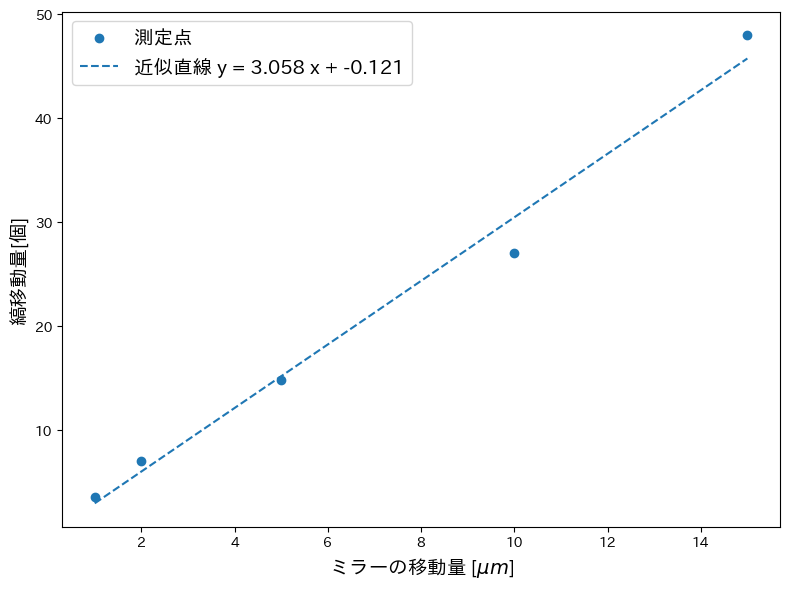

In [131]:
delta_d = df_1["ミラーの移動量(μm)"]
N = df_1["縞の移動量(個)"]

#近似曲線の作成
coef = np.polyfit(delta_d, N, 1)
N_pred = coef[0] * delta_d + coef[1]

plt.figure(figsize=(8,6))
plt.scatter(delta_d, N, marker="o", label="測定点")
plt.plot(delta_d, N_pred, linestyle="--", label=f"近似直線 y = {coef[0]:.3f} x + {coef[1]:.3f}")
plt.xlabel("ミラーの移動量 [$\mu m$]", fontsize=14)
plt.ylabel("縞移動量[個]", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("Pictures/A4-2.png")
plt.show()

In [142]:
#マッハツェンダー干渉計
data_2 = {"差圧(kpa)": [5, 8, 10, 11, 13, 14, 15.4, 18, 18.5], "縞の移動量(個)": [1.2, 1.8, 3, 3, 3, 3.5, 3.8, 4, 4.5]}
df_2 = pd.DataFrame(data_2)
df_2.to_csv("DataSet/jikkenA4-2.csv", index=False)
df_2.head(9)

,差圧(kpa),縞の移動量(個)
0,5.0,1.2
1,8.0,1.8
2,10.0,3.0
3,11.0,3.0
4,13.0,3.0
5,14.0,3.5
6,15.4,3.8
7,18.0,4.0
8,18.5,4.5


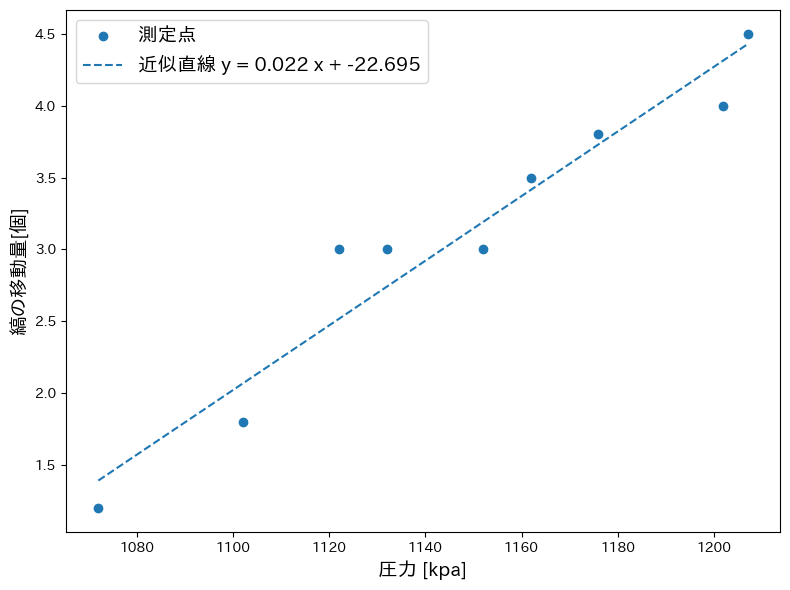

In [136]:
#近似曲線の作成
d = 7.1
T = 20
P_room = 1022 #hpa

p = df_2["差圧(kpa)"]*10 + 1022
N = df_2["縞の移動量(個)"]

coef = np.polyfit(p, N, 1)
N_pred = coef[0] * p + coef[1]

plt.figure(figsize=(8,6))
plt.scatter(p, N, marker="o", label="測定点")
plt.plot(p, N_pred, linestyle="--", label=f"近似直線 y = {coef[0]:.3f} x + {coef[1]:.3f}")
plt.xlabel("圧力 [kpa]", fontsize=14)
plt.ylabel("縞の移動量[個]", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("Pictures/A4-3.png")
plt.show()

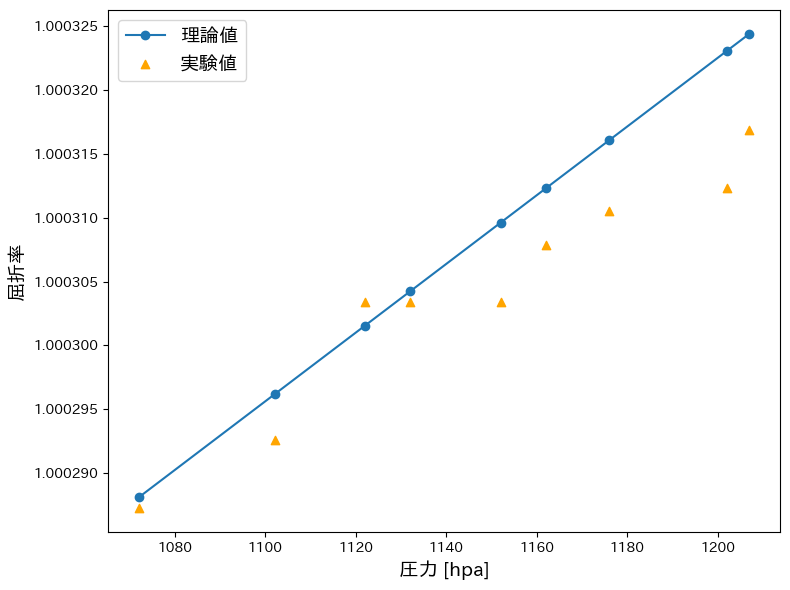

In [156]:
def Edlen(lamda, P, T):
    lamda = lamda**2
    n0_1 = 8.34213e-5 + 2.40603 * (1e-2 / (130 - 1/lamda) ) + 1.5997 * (1e-4 / (38.9 - 1/lamda))
    n_1 = (P * n0_1 * (1 + P*(0.817 - 0.0113*T)*1e-6)) / (720.775 * (1 + 0.003661*T))
    n = n_1 + 1                                                      
    return n0_1, n

lamda_th = 594.1e-3
lamda_ex = 636.9e-3

_, n_th = Edlen(lamda_th, p*0.75, T)
n_0, _ = Edlen(lamda_ex, p*0.75, T)
n_ex = 1 + n_0 + N*(lamda_ex/(d*1e4))

plt.figure(figsize=(8,6))
plt.plot(p, n_th, marker="o", label="理論値")
plt.scatter(p, n_ex, marker="^", label="実験値", color="orange")
plt.xlabel("圧力 [hpa]", fontsize=14)
plt.ylabel("屈折率", fontsize=14)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("Pictures/A4-4.png")
plt.show()

In [148]:
#相対誤差(%)
print(np.average(np.abs(n_ex - n_th)/n_th)*100)

0.00046173571873724323


In [150]:
print(n_th)

0    1.000288
1    1.000296
2    1.000302
3    1.000304
4    1.000310
5    1.000312
6    1.000316
7    1.000323
8    1.000324
Name: 差圧(kpa), dtype: float64


In [151]:
print(n_ex)

0    1.000287
1    1.000293
2    1.000303
3    1.000303
4    1.000303
5    1.000308
6    1.000311
7    1.000312
8    1.000317
Name: 縞の移動量(個), dtype: float64


In [152]:
n_th_6 = np.array([f"{x:.6f}" for x in n_th])
n_ex_6 = np.array([f"{x:.6f}" for x in n_ex])

data_3 = {"大気圧(Torr)": p*0.75, "屈折率(理論値)": n_th_6, "屈折率(実験値)": n_ex_6}
df_3 = pd.DataFrame(data_3)
df_3.to_csv("DataSet/jikkenA4-3.csv",  index=False)
df_3.head()

,大気圧(Torr),屈折率(理論値),屈折率(実験値)
0,804.0,1.000288,1.000287
1,826.5,1.000296,1.000293
2,841.5,1.000302,1.000303
3,849.0,1.000304,1.000303
4,864.0,1.000310,1.000303
